# <a name='contexto'>Contexto</a>
Um grande banco tem o objetivo de desenvolver um modelo para identificar maior probabilidade de <i>default</i>. A tarefa será realizar uma análise descritiva e tratamento dos dados para compreender o perfil dos clientes e, identificar quais fatores podem influenciar no risco de crédito.

Esclarecimento de termos:
* O ***default*** é um processo que ocorre quando o devedor não consegue honrar com suas obrigações

# <a name='indice'>Índice</a>
* [Contexto](#contexto)
* [Índice](#indice)
* [1. Importando Bibliotecas e Base de Dados](#secao_1)
* [2. Conhecendo e Tratando a Base de Dados](#secao_2)
* [3. Análise Descritiva](#secao_3)
* [4. ](#secao_4)
* [5. ](#secao_5)
* [6. ](#secao_6) 
* [7. ](#secao_7)
* [Conclusão](#conclusao)

#  <a name="secao_1">1. Importando Bibliotecas e Base de Dados</a>
[voltar ao índice](#indice)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt

In [2]:
df_risco_credito = pd.read_csv('dados/risco_credito.csv')

In [3]:
df_risco_credito.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


#  <a name="secao_2">2. Conhecendo e Tratando a Base de Dados</a>
[voltar ao índice](#indice)

#### Informações gerais

In [4]:
df_risco_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   signo                       43825 non-null  object 
 7   genero                      57406 non-null  object 
 8   perfil_facebook             58185 non-null  object 
 9   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.9+ MB


In [5]:
df_risco_credito.isnull().sum()

default                        4626
t_risco                         785
valor_emprestimo                785
prazo_pagamento                 785
limite_credito                19753
renda                           785
signo                         20767
genero                         7186
perfil_facebook                6407
n_emprestimos_inadiplentes      803
dtype: int64

### Consolidando base de dados

#### Tratando de valores nulos

Por conta da aparente irrelevância, e da elevada quantidade de valores faltantes, foi optado em excluir a coluna <i>signo</i>, da base de dados.

In [8]:
df_risco_credito.drop('signo', axis=1, inplace=True)

Index(['default', 't_risco', 'valor_emprestimo', 'prazo_pagamento',
       'limite_credito', 'renda', 'genero', 'perfil_facebook',
       'n_emprestimos_inadiplentes'],
      dtype='object')

Acerca da coluna <i>limite_credito</i>, apesar da grande quantidade de valores faltantes, parece ser uma ideia razoável utilizar a mediana em seu preenchimento. Outros métodos poderiam levar à distorções mais significativas.

In [9]:
df_risco_credito.limite_credito.fillna(df_risco_credito.limite_credito.median(), inplace=True)

A quantidade de valores faltantes nas demais colunas, em conjunto, possuem uma quantidade expressiva de dados. Sua exclusão resultará na perda de aproximadamente 20% da base de dados. Se pode optar por tratar mais algumas das colunas, entretanto, aqui seguirei pela exclusão.

In [11]:
df_risco_credito.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51259 entries, 0 to 64591
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     51259 non-null  object 
 1   t_risco                     51259 non-null  float64
 2   valor_emprestimo            51259 non-null  float64
 3   prazo_pagamento             51259 non-null  float64
 4   limite_credito              51259 non-null  float64
 5   renda                       51259 non-null  float64
 6   genero                      51259 non-null  object 
 7   perfil_facebook             51259 non-null  object 
 8   n_emprestimos_inadiplentes  51259 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.9+ MB


#  <a name="secao_3">3. Análise Descritiva</a>
[voltar ao índice](#indice)

#### Tratar features qualitativas

In [81]:
df_risco_credito.columns

Index(['default', 't_risco', 'valor_emprestimo', 'prazo_pagamento',
       'limite_credito', 'renda', 'genero', 'perfil_facebook',
       'n_emprestimos_inadiplentes'],
      dtype='object')

In [75]:
df_risco_credito.default = df_risco_credito.default.map({False:'Não', True:'Sim'})
df_risco_credito.perfil_facebook = df_risco_credito.perfil_facebook.map({False:'Não', True:'Sim'})
df_risco_credito.genero = df_risco_credito.genero.map({'m':'Masculino', 'f':'Feminino'})

#### Tratar features quantitativas

In [39]:
numericos = ['t_risco', 'valor_emprestimo', 'prazo_pagamento', 'limite_credito', 'renda', 'n_emprestimos_inadiplentes']

In [44]:
df_risco_credito[numericos].describe().round(2)

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,51259.00,51259.00,51259.00,51259.00,51259.00,51259.00
mean,0.29,13419.57,40.67,31379.34,71190.55,0.00
std,0.10,7957.40,9.50,30558.39,52157.41,0.08
min,0.00,527.07,36.00,0.00,4821.18,0.00
25%,0.22,7227.28,36.00,17289.00,44027.13,0.00
50%,0.29,12013.12,36.00,25775.00,60038.33,0.00
75%,0.36,18036.87,36.00,35003.50,85033.27,0.00
max,0.81,35059.60,60.00,613117.00,5000027.83,5.00


#### Coeficiente de Variação

In [52]:
def coeficiente_variacao(coluna):
    '''Essa função calcula o coeficiente de variação dos valores de uma determinada coluna, e as exibe'''
    coeficiente = st.stdev(coluna)/st.mean(coluna)
    print(f'CV_{coluna.name}:', round(coeficiente, 2))

In [70]:
_ = [coeficiente_variacao(df_risco_credito[coluna]) for coluna in numericos]

CV_t_risco: 0.34
CV_valor_emprestimo: 0.59
CV_prazo_pagamento: 0.23
CV_limite_credito: 0.97
CV_renda: 0.73
CV_n_emprestimos_inadiplentes: 17.47


#  <a name="secao_4">4. Perfil dos Clientes</a>
[voltar ao índice](#indice)

In [95]:
df_risco_credito.default.value_counts(normalize=True)

Não    0.841881
Sim    0.158119
Name: default, dtype: float64

In [96]:
df_risco_credito.genero.value_counts(normalize=True)

Masculino    0.676213
Feminino     0.323787
Name: genero, dtype: float64

In [97]:
df_risco_credito.perfil_facebook.value_counts(normalize=True)

Não    0.629841
Sim    0.370159
Name: perfil_facebook, dtype: float64

* 84% dos clientes não estão em situação <i>default</i>
* 67,6% são do gênero masculino
* 63% relataram não usarem o Facebook

#  <a name="secao_5">5. Análise de Outliers</a>
[voltar ao índice](#indice)

#### Feature renda

C:\Users\Thiago\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='renda'>

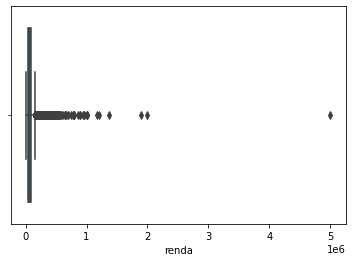

In [123]:
sns.boxplot(df_risco_credito.renda)

In [127]:
df_risco_credito.renda.sort_values(ascending=False).head(10)

63593    5000027.83
37679    2000018.20
41257    1900023.70
42471    1362027.90
41558    1200025.56
23402    1176021.62
28680    1000036.73
18898    1000035.68
23822    1000023.87
62927     950021.60
Name: renda, dtype: float64

C:\Users\Thiago\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Renda')

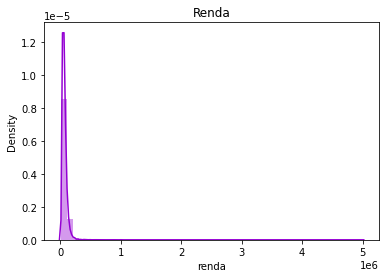

In [122]:
sns.distplot(df_risco_credito.renda, bins=50, color='darkviolet').set_title('Renda')

#  <a name="secao_6">6. </a>
[voltar ao índice](#indice)

#  <a name="secao_7">7. </a>
[voltar ao índice](#indice)

#  <a name="conclusao">Conclusão</a>
[voltar ao índice](#indice)